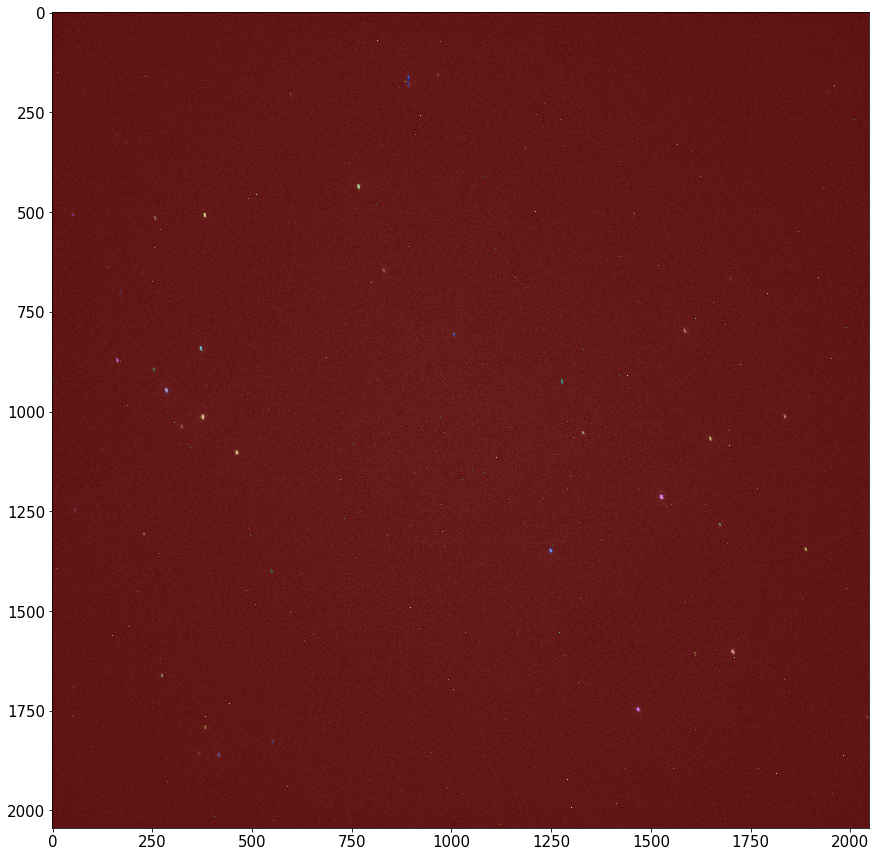

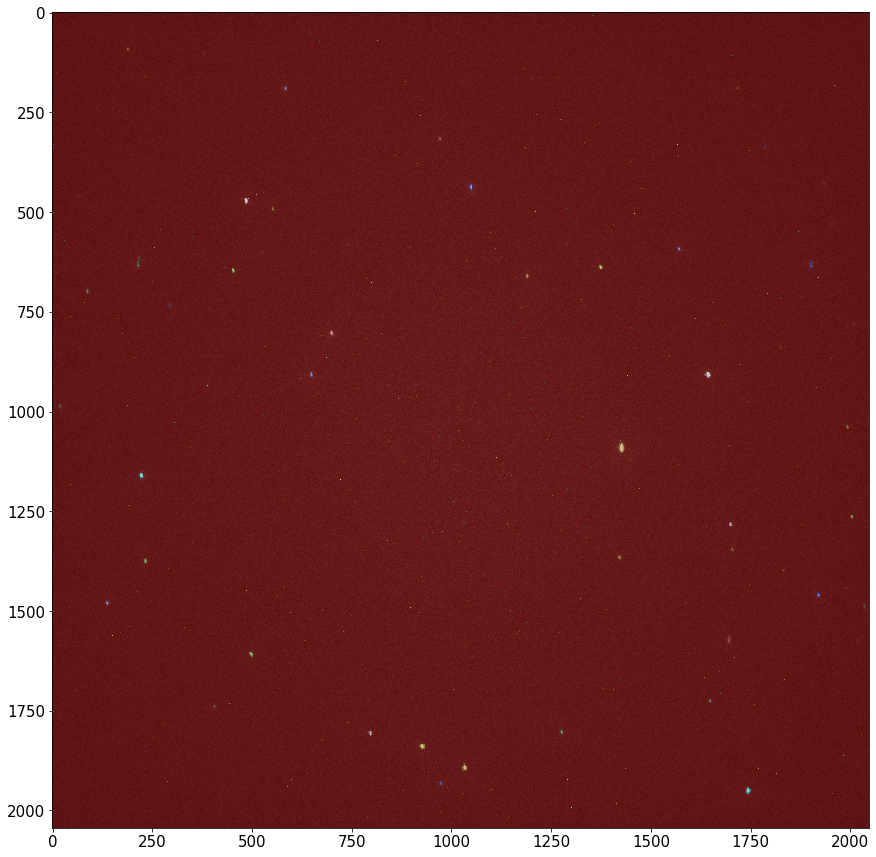

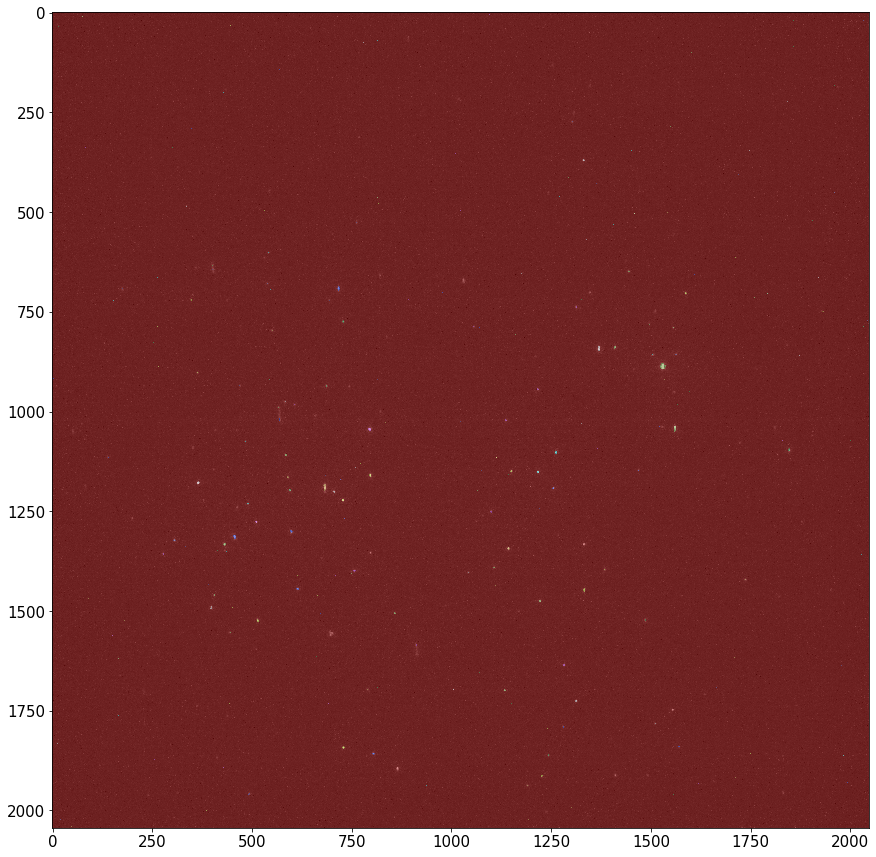

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
  
from PIL import Image
from pylab import *
from pathlib import Path
from skimage.color import rgb2gray
from skimage.measure import label, regionprops
from skimage.filters import threshold_yen
from skimage.filters import threshold_minimum
from skimage.morphology import closing, square
from skimage.segmentation import clear_border
from skimage.color import label2rgb
%matplotlib inline

shear_rate_20k = pd.DataFrame(columns=['shear rate', 'eccentricity', 'convex_area',
                                      'major_axis_length','minor_axis_length','orientation'])

# iterate over all images in a certain folder
pathlist = Path('Raw data_All images/20k_4 images/yen').glob('**/*.jpg')
for path in pathlist:
    path_in_str = str(path)
#    print(path_in_str)
    
    # open the image
    image = Image.open(path_in_str)
    img_array = np.array(image)
    image_gray = rgb2gray(img_array)
    
    # apply threshold
    image = image_gray
    thresh = threshold_yen(image)
    binary = image <= thresh
    bw = closing(image > thresh, square(3))
    plt.rcParams.update({'font.size': 15})
#    plt.figure(figsize = (15,15))
#    imshow(binary,cmap=plt.cm.gray)
    
    # remove artifacts connected to image border
    cleared = clear_border(bw)
    
    # label image regions
    label_image = label(cleared)
    image_label_overlay = label2rgb(label_image, image=image)
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.imshow(image_label_overlay)
    
    # extract features
    props = regionprops(label_image,intensity_image=image_gray, coordinates='xy')
    
    for i in props: 
        # exclude circular(folded) and small(might be background noise) dots
        if i.eccentricity>.8 and i.convex_area>20:                                
            shear_rate_20k = shear_rate_20k.append({'shear rate': 20000, 'eccentricity': i.eccentricity, 
                                                    'convex_area': i.convex_area,'major_axis_length': i.major_axis_length,
                                                   'minor_axis_length': i.minor_axis_length,'orientation': i.orientation},
                                                   ignore_index=True)

#print("20k_4 images", shear_rate_0k, sep='\n')

In [4]:
# save dataframe
shear_rate_20k.to_pickle('shear_rate_20k')
a = pd.read_pickle('shear_rate_20k')
print(a)

    shear rate  eccentricity  convex_area  major_axis_length  \
0      20000.0      0.933105         31.0           9.717892   
1      20000.0      0.982647        178.0          33.212487   
2      20000.0      0.835942        118.0          15.640868   
3      20000.0      0.849726         81.0          13.531931   
4      20000.0      0.871793         41.0           9.689946   
5      20000.0      0.926993         35.0          10.446412   
6      20000.0      0.940124         25.0           9.444264   
7      20000.0      0.887619         26.0           8.481434   
8      20000.0      0.834319         74.0          12.582965   
9      20000.0      0.832223         75.0          12.673007   
10     20000.0      0.884084         52.0          11.521590   
11     20000.0      0.878876         60.0          12.089277   
12     20000.0      0.856971         71.0          13.021725   
13     20000.0      0.853727         46.0          10.356572   
14     20000.0      0.879392         50.